In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import re
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1- Gathering Data

1-1 Gathering data from twitter-archive csv format

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in twitter-archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# checking the file content and structure
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


1-2 Gathering The tweet image predictions Programatically hosted on udacity

In [3]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Get file name "url.split('/')[-1]"

#Check if file not exist get content from url else ignore
if not os.path.isfile(url.split('/')[-1]):
    with open(url.split('/')[-1], mode = 'wb') as wantedfile:
        wantedfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Gathering for each tweet's
How many favorites the tweet had?
How many Count of the retweet?
How many followers the user had?
How many favorites the user had?
The date and time of the creation?
Using the tweet IDs in the WeRateDogs Twitter archive 
Using Twitter API

In [4]:
# List where we will store the dictionaries of our result
df_list = []

# List frame where we will store the tweet_id of the errors
error_list = []

# Autontification to twetter API
if not os.path.isfile('tweet_json.txt'):
    consumer_key = '*****************'
    consumer_secret = '******************************'
    access_token = '*******************'
    access_token_secret = '****************************'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
    api = tweepy.API(auth, 
                     parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                     wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                     wait_on_rate_limit_notify = True) # Print a notification when Tweepy is waiting for rate limits to replenish


# Get the current time to calculate the time of excution
    start = time.time()

# Get the tweet object for all the teweets in twitter_archive dataframe that we loaded above
    for tweet_id in twitter_archive['tweet_id']:
        try:
            page = api.get_status(tweet_id, tweet_mode = 'extended')
            df_list.append(page)
    # Catch the exceptions of the TweepError
        except Exception as e:
            print(str(tweet_id)+ " _ " + str(e))
            error_list.append(tweet_id)

# Calculate the time of excution
    end = time.time()
    print(end - start)

In [5]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error_list))

The lengh of the result 0
The lengh of the errors 0


The lengh of the result 2331
The lengh of the errors 25
From the above results:

We reached the limit of the tweepy API twice (sleeping twice for 381) but wait_on_rate_limit automatically wait for rate limits 
to replenish and wait_on_rate_limit_notify print a notification when Tweepy is waiting
The total time was about 2130.789879798889 seconds (~ 35 min)
We could get 2331 tweet_id correctly with 25 errors [ErrorNo:24,Type:'No status found with that ID.';ErrNo:1,Type:'Sorry, you are not authorized to see this status.']
(I will query those 25 errors separately in next step)

In [6]:
# We repeat the above operations again for the "25" tweet_ids that we coudln't get and append the result to df_list
# reapat steps till error_list be empty
while len(error_list)!=0:
    for e in error_list:
        try:
            df_list.append(page)
            error_list.remove(e)
        except Exception:
            print(str(tweet_id)+ " _ " + str(e))

In [7]:
# We can see that now the 25 errors saved in the list
# lengh of the result
print("The lengh of the result after Querying the errors separately", len(df_list))
print("The lengh of the errors ", len(error_list))

The lengh of the result after Querying the errors separately 0
The lengh of the errors  0


In [8]:
# Then in this code block we isolate the json part of each tweepy status object 
# that we have downloaded and we add them all into a list....
list_of_tweets_dics = []
if not os.path.isfile('tweet_json.txt'):
    for each_json_tweet in df_list:
        list_of_tweets_dics.append(each_json_tweet)
    #...and then we write this list into a txt file:
    with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_tweets_dics, indent=4))
        


In [9]:
# Now we are going to create a DataFrame from the tweet_json.txt file:
tweet_list = []
with open('tweet_json.txt', encoding='utf-8') as tweet_json_file:  
    all_tweet_data = json.load(tweet_json_file)
    for each_tweet in all_tweet_data:
        tweet_id = each_tweet['id']
        followers_count = each_tweet['user']['followers_count']
        favourites_count = each_tweet['user']['favourites_count']
        favorite_count = each_tweet['favorite_count']
        retweet_count = each_tweet['retweet_count'] 
        created_at = each_tweet['created_at']
        

        tweet_list.append({'tweet_id': int(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': pd.to_datetime(created_at),
                             'followers_count':int(followers_count),
                             'favourites_count':int(favourites_count),
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at','followers_count','favourites_count'
                                                       ])

In [10]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,followers_count,favourites_count
0,892420643555336193,39329,8785,2017-08-01 16:23:56+00:00,4653958,125634
1,892177421306343426,33671,6438,2017-08-01 00:17:27+00:00,4653959,125634
2,891815181378084864,25362,4270,2017-07-31 00:18:03+00:00,4653959,125634
3,891689557279858688,42708,8872,2017-07-30 15:58:51+00:00,4653960,125634
4,891327558926688256,40846,9652,2017-07-29 16:00:24+00:00,4653960,125634
...,...,...,...,...,...,...
2344,666049248165822465,110,40,2015-11-16 00:24:50+00:00,4654451,125643
2345,666044226329800704,306,143,2015-11-16 00:04:52+00:00,4654451,125643
2346,666033412701032449,127,46,2015-11-15 23:21:54+00:00,4654451,125643
2347,666029285002620928,131,47,2015-11-15 23:05:30+00:00,4654451,125643


2-Assess

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
# Check if exist repeating tweet id
print(twitter_archive.tweet_id.value_counts())
sum(twitter_archive.tweet_id.duplicated())

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64


0

In [14]:
#  Make sure rating numerators are consistent.
sorted_unique_numerator=twitter_archive.rating_numerator.unique()
sorted_unique_numerator.sort()
sorted_unique_numerator

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [15]:
# 1 Check for any numerators in data frame that equal zero.
twitter_archive[twitter_archive.rating_numerator == 0]
#count is only 2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [16]:
# 2 Make sure rating denominator are consistent.
sorted_unique_denominator=twitter_archive.rating_denominator.unique()
sorted_unique_denominator.sort()
sorted_unique_denominator

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170], dtype=int64)

In [17]:
# 2 Check for any denominator in data frame that equal zero.
twitter_archive[twitter_archive.rating_denominator == 0]
#count is only 1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
# 3 Detect entries where there are more than one dog stage.
twitter_archive.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]
# it is 14 tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [19]:
twitter_archive[twitter_archive['expanded_urls'].isnull()].loc[:,['expanded_urls']]



,expanded_urls
30,NaN
55,NaN
64,NaN
113,NaN
148,NaN
179,NaN
185,NaN
186,NaN
188,NaN
189,NaN


In [20]:
twitter_archive[twitter_archive['in_reply_to_status_id'].isnull()].loc[:,['in_reply_to_status_id']]


,in_reply_to_status_id
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2351,NaN
2352,NaN
2353,NaN
2354,NaN


In [21]:
twitter_archive[twitter_archive['in_reply_to_user_id'].isnull()].loc[:,['in_reply_to_user_id']]


,in_reply_to_user_id
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2351,NaN
2352,NaN
2353,NaN
2354,NaN


In [22]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()].loc[:,['retweeted_status_id']]

,retweeted_status_id
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2351,NaN
2352,NaN
2353,NaN
2354,NaN


In [23]:
twitter_archive[twitter_archive['expanded_urls'].isnull()].loc[:,['expanded_urls', 
                                                                  'in_reply_to_status_id', 
                                                                  'in_reply_to_user_id',
                                                                 'retweeted_status_id']]
twitter_archive.loc[(twitter_archive[['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id']] == 'NaN').sum()]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [25]:
# -*- coding: utf-8 -*-check only contain english char
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [26]:
NonEnglishlist=[]
for index, row in twitter_archive.iterrows():
    if  isEnglish(row['name'])==False:
        print(row['tweet_id'],row['name'])
        NonEnglishlist.append(row['tweet_id'])


757354760399941633 Devón
720389942216527872 Ralphé
717047459982213120 Flávio
694352839993344000 Oliviér
688547210804498433 Frönq
686050296934563840 Flávio
669371483794317312 Oliviér
668872652652679168 Amélie
668528771708952576 Gòrdón


In [27]:
# Using the describe method:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
# What are possible values for img_num?
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
# What is a range of pN_conf values? They should be between 0 and 1.
image_predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [31]:
image_predictions.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [32]:
image_predictions.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [33]:
# Many dog names are in lowercase in the p1, the p2 and the p3 columns.
# Some columns have non descriptive names (p1, p1_conf, p1_dog, p2,p2_conf, p2_dog, p3, p3_conf, p3_dog)

In [34]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2349 non-null   int64              
 1   favorite_count    2349 non-null   int64              
 2   retweet_count     2349 non-null   int64              
 3   created_at        2349 non-null   datetime64[ns, UTC]
 4   followers_count   2349 non-null   int64              
 5   favourites_count  2349 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 110.2 KB


There are four dimensions of the quality problem as follows : 

Completeness: do we have all the documents we want to have? Will we have documents missing or not? Is there a shortage of unique rows , columns, or cells? 

Validity: we have the documents, but they are not valid, i.e. they are not in compliance with a given schema. A schema is a given collection of data rules. Real-world restrictions (e.g. negative height is impossible) and table-specific constraints ( e.g. special key constraints in tables) may be such rules. 

Precision: incorrect data is incorrect data that is true. It adheres to the schema that is described, but it is still incorrect. Example: the weight of a patient who is 5 lbs too heavy because the scale was defective. 

Consistency: inconsistent information is true as well as reliable, but there are several correct ways to refer to the same thing. In columns that represent the same data across tables and/or inside tables, consistency, i.e. a standard format, is needed. 


There are Three conditions of the Tidy Data requirements as follows:


Each variable forms a column.

Each observation forms a row.

Each type of observational unit forms a table.

## Quality Issues
### Dataset : twitter_archive
Quality Issue-----------------------------------Quality dimensions
    1.	All dog stages using 'None' instead of 'NaN'.---------------------------------------------Consistency
    2.	In name change 'None' to NaN.-------------------------------------------------------------Consistency
    3.	There are many invalid names present {they all start with lower case letters}--------------Validity	
    4.	Columns pertaining to retweets and expanded URLs are unnecessary.-------------------------Consistency
    5.	Timestamp is string not date time --------------------------------------------------------Consistency
    6.	Rating_numerator there are 39 different numerators
         [   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776]
     two numerators are equal to 0 tweet_id: 835152434251116546 (rating in the text column is 0/10)
     tweei_id: 746906459439529985 (rating in the text column is 0/10)-------------------------------------------Precision
    7.	Rating_denominator there are 18 different denumerators ,
         [  0,  2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80, 90,110, 120, 130, 150,170]
         Valid rates are [2,7,10]
         one of them is equal to 0 tweet_id: 835246439529840640 (rating in the text column is 13/10)------------Precision
	8.	There are a few cases, where a dog has more than one style: tweet_id: 854010172552949000 (doggo, floofer) tweet_id:              808106460588765000 (doggo, pupper) tweet_id: 801115127852503000 (doggo, pupper) tweet_id: 781308096455073000 (doggo,            pupper) ----------------------------------------------Validity
	9.	There could be encoding problem for 
         757354760399941633 Devón
         720389942216527872 Ralphé
         717047459982213120 Flávio
         694352839993344000 Oliviér
         688547210804498433 Frönq
         686050296934563840 Flávio
         669371483794317312 Oliviér
         668872652652679168 Amélie
         668528771708952576 Gòrdón
        (the name value uses non-English characters)------------Validity
        ------------------------------------------------------------------------------------------------------
### Dataset:image_predictions
Quality Issue-----------------------------------Quality dimensions
  1.	There are a few cases, where a p1_dog, p2_dog, and p3_dog are all "False" in df_image it means there is no correct   prediction.-----------------------------------------------------Validity
  2.	Values for p1, 2, and p3 not always capitalized ------------Precision


## Tidiness Issues
### Dataset "twitter_archive"
1.Doggo, floofer, pupper, puppo are one variable spread across different columns  ----------------Each variable forms a column.
2.Rating_numerator and rating_denominator can be combined into one column ------------------------Each variable forms a column.
### Dataset "image_predictions"
3.“img_num" contains integer values ranging from 1 to 4 but only 1 img_url is present (this column semantics is not clear). The column may not have any use here.	
General.
4.There are too many datasets and their overall structure is untidy ---------------Each type of observational unit forms a table.
5.After merging data frames date time in “twitter_archive” has the same values as timestamp column in “tweet_json”.
---------------------------------------------------------------------------------------------------------------Duplicate column
6.There are unnecessary data Retweets, Duplicated tweet id, tweet have not picture.----------------------------Duplications

3- Cleaning data

In [74]:
# Make a copy of df_tweet_Archive.
twitter_archive_Copy = twitter_archive.copy()
# Make a copy of df_image_predictions.
image_predictions_Copy=image_predictions.copy()
# Make a copy of df_tweet_json.
tweet_json_Copy=tweet_json.copy()

In [75]:
 # 3.1.1 Define: There are too many datasets and their overall structure is untidy  
    #1-merge twitter_archive,image_predictions into df_merge_Twitter_Image_Archive
    #2- merge df_merge_Twitter_Image_Archive,tweet_json
    #using merge built in function
 # 3.1.2 Clean: Since we want to create one high quality and tidy master pandas DataFrame
   # merging our dataframes in one
df_merge_Twitter_Image_Archive = pd.merge(twitter_archive_Copy, image_predictions_Copy, how = 'left',on=['tweet_id'])
df_merge_Twitter_Image_Archive = pd.merge(df_merge_Twitter_Image_Archive, tweet_json_Copy, how = 'left', on=['tweet_id'])
 # 3.1.3 Test: list data of the new dataset.
df_merge_Twitter_Image_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,followers_count,favourites_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,39329.0,8785.0,2017-08-01 16:23:56+00:00,4653958.0,125634.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,33671.0,6438.0,2017-08-01 00:17:27+00:00,4653959.0,125634.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,25362.0,4270.0,2017-07-31 00:18:03+00:00,4653959.0,125634.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,42708.0,8872.0,2017-07-30 15:58:51+00:00,4653960.0,125634.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,40846.0,9652.0,2017-07-29 16:00:24+00:00,4653960.0,125634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.243682,True,Doberman,0.154629,True,110.0,40.0,2015-11-16 00:24:50+00:00,4654451.0,125643.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.360687,True,miniature_pinscher,0.222752,True,306.0,143.0,2015-11-16 00:04:52+00:00,4654451.0,125643.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.138584,True,bloodhound,0.116197,True,127.0,46.0,2015-11-15 23:21:54+00:00,4654451.0,125643.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,131.0,47.0,2015-11-15 23:05:30+00:00,4654451.0,125643.0


In [76]:
 # 3.1.3 list info for the new dataset.
df_merge_Twitter_Image_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   object             
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [77]:
# 3.2.1 Define: There are unnecessary data  like Retweets, Duplicated tweet id, tweet have not picture
# drop retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
#drop tweet have not picture
#3.2.1.1 Clean: Delete the retweets
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive[pd.isnull(df_merge_Twitter_Image_Archive.retweeted_status_id)]


In [78]:
#3.2.2.2 Delete columns related to retweet
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.drop('retweeted_status_id', 1)
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.drop('retweeted_status_user_id', 1)
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.drop('retweeted_status_timestamp', 1)
# 3.2.1 Test
df_merge_Twitter_Image_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,followers_count,favourites_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.085851,False,banana,0.076110,False,39329.0,8785.0,2017-08-01 16:23:56+00:00,4653958.0,125634.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.090647,True,papillon,0.068957,True,33671.0,6438.0,2017-08-01 00:17:27+00:00,4653959.0,125634.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.078253,True,kelpie,0.031379,True,25362.0,4270.0,2017-07-31 00:18:03+00:00,4653959.0,125634.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.168086,True,spatula,0.040836,False,42708.0,8872.0,2017-07-30 15:58:51+00:00,4653960.0,125634.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,40846.0,9652.0,2017-07-29 16:00:24+00:00,4653960.0,125634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,...,0.243682,True,Doberman,0.154629,True,110.0,40.0,2015-11-16 00:24:50+00:00,4654451.0,125643.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,...,0.360687,True,miniature_pinscher,0.222752,True,306.0,143.0,2015-11-16 00:04:52+00:00,4654451.0,125643.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,...,0.138584,True,bloodhound,0.116197,True,127.0,46.0,2015-11-15 23:21:54+00:00,4654451.0,125643.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,131.0,47.0,2015-11-15 23:05:30+00:00,4654451.0,125643.0


In [79]:
#3.2.2.2 Delete duplicated tweet_id
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.drop_duplicates()
#3.2.2.3 Delete tweets with no pictures
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.dropna(subset = ['jpg_url'])
# #3.2.3 Test
len(df_merge_Twitter_Image_Archive)

1994

In [80]:
#3.3.1 Define: All dog stages using 'None' instead of 'NaN'.
df_merge_Twitter_Image_Archive[['doggo', 'floofer', 'pupper', 'puppo']].sample(1000)
# Function Change None to NaN
def change_to_null(item):
    if item == 'None':
        item = np.NaN
    return item
#3.3.2 Clean: using defined function "change_to_null" to convert None to NaN
df_merge_Twitter_Image_Archive['doggo'] = [change_to_null(item) for item in df_merge_Twitter_Image_Archive['doggo']]
df_merge_Twitter_Image_Archive['floofer'] = [change_to_null(item) for item in df_merge_Twitter_Image_Archive['floofer']]
df_merge_Twitter_Image_Archive['pupper'] = [change_to_null(item) for item in df_merge_Twitter_Image_Archive['pupper']]
df_merge_Twitter_Image_Archive['puppo'] = [change_to_null(item) for item in df_merge_Twitter_Image_Archive['puppo']]
#3.3.3 Test: Check NaNs
df_merge_Twitter_Image_Archive[['doggo', 'floofer', 'pupper', 'puppo']].sample(1000)

,doggo,floofer,pupper,puppo
1134,NaN,NaN,NaN,NaN
2051,NaN,NaN,NaN,NaN
2060,NaN,NaN,NaN,NaN
1059,NaN,NaN,pupper,NaN
311,NaN,NaN,NaN,NaN
...,...,...,...,...
90,NaN,NaN,NaN,NaN
2238,NaN,NaN,NaN,NaN
43,doggo,NaN,NaN,NaN
2335,NaN,NaN,NaN,NaN


In [81]:
# 3.4.1 Define: In name change 'None' to NaN
df_merge_Twitter_Image_Archive.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [82]:
#3.4.2.1 Clean: using defined function "change_to_null" to convert None to NaN
#assign NaN to all invalid names {they all start with lower case letters}
df_merge_Twitter_Image_Archive['name'] = [change_to_null(item) for item in df_merge_Twitter_Image_Archive['name']]
#3.4.2.2  Clean :Check if found inavid named(they all start with lower case letters) assign it .
for index, row in df_merge_Twitter_Image_Archive.iterrows():
    if row['name']!=np.nan:
        if  str(row['name'])[0].isupper()==False:
            print(row['tweet_id'],row['name'])
            row['name']=np.NaN
#3.4.3 Test:            
df_merge_Twitter_Image_Archive[['name']].sample(1000)


891087950875897856 nan
890729181411237888 nan
889665388333682689 nan
887517139158093824 such
887343217045368832 nan
887101392804085760 nan
885167619883638784 nan
884441805382717440 nan
883117836046086144 nan
881536004380872706 a
880872448815771648 nan
880095782870896641 nan
875021211251597312 nan
874057562936811520 nan
873580283840344065 nan
872967104147763200 nan
872820683541237760 nan
872486979161796608 nan
870804317367881728 nan
868622495443632128 nan
867900495410671616 nan
867051520902168576 nan
864873206498414592 nan
863079547188785154 nan
862096992088072192 nan
861288531465048066 nan
860184849394610176 nan
859607811541651456 nan
859196978902773760 quite
859074603037188101 nan
858843525470990336 nan
857393404942143489 nan
856526610513747968 nan
855851453814013952 nan
855459453768019968 quite
854120357044912130 nan
854010172552949760 nan
853639147608842240 nan
851591660324737024 nan
849776966551130114 nan
849336543269576704 nan
848690551926992896 nan
847116187444137987 nan
84581204

,name
1334,Ambrose
1935,NaN
1368,a
114,Cody
1660,NaN
...,...
1394,Thumas
632,Maximus
768,Derek
835,Gerald


In [83]:
df_merge_Twitter_Image_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   object             
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1448 non-null   object             
 10  doggo                  74 non-null     object             
 11  floofer                8 non-null      object           

In [84]:
#3.5.1 Define: Rating_numerator there are 39 different numerators
df_merge_Twitter_Image_Archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  143,  121,   26,    2,  144,   88,    1,
        420], dtype=int64)

In [85]:
#3.5.2 Clean: Re-avaluate rating_numerator
df_merge_Twitter_Image_Archive['rating_numerator'] = df_merge_Twitter_Image_Archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [86]:
#3.5.3 Test: Get unique values after cleaning
df_merge_Twitter_Image_Archive['rating_numerator'].unique()

array(['13', '12', '14', '13.5', '11', '6', '10', '0', '84', '24', '9.75',
       '5', '11.27', '3', '7', '8', '9', '4', '165', '1776', '204', '50',
       '99', '80', '45', '60', '44', '143', '121', '11.26', '2', '144',
       '88', '1', '420'], dtype=object)

In [87]:
df_merge_Twitter_Image_Archive['rating_numerator'] = df_merge_Twitter_Image_Archive['rating_numerator'].astype(str).astype(float)

In [88]:
df_merge_Twitter_Image_Archive['rating_numerator'] 

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 1994, dtype: float64

In [89]:
#3.6.1 Define:  Rating_denominator there are 18 different numerators
df_merge_Twitter_Image_Archive['rating_denominator'].unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130, 110,
       120,   2], dtype=int64)

In [90]:
#3.6.2 Clear: Convert int float
df_merge_Twitter_Image_Archive['rating_denominator'] = df_merge_Twitter_Image_Archive['rating_denominator'].astype(str).astype(float)

In [91]:
#3.6.2 Test:Check cleaning result
df_merge_Twitter_Image_Archive['rating_denominator'].unique()

array([ 10.,  70.,   7., 150.,  11., 170.,  20.,  50.,  90.,  80.,  40.,
       130., 110., 120.,   2.])

In [92]:
df_merge_Twitter_Image_Archive['rating_denominator']

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2351    10.0
2352    10.0
2353    10.0
2354    10.0
2355    10.0
Name: rating_denominator, Length: 1994, dtype: float64

In [93]:
#3.7.1 Define: the name value uses non-English characters
#3.7.2  Clean:remove twitter which contain non-english character
NonEnglishlist
while len(NonEnglishlist)!=0:
    for e in NonEnglishlist:
        try:
            df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive[df_merge_Twitter_Image_Archive.tweet_id == e]
            NonEnglishlist.remove(e)
        except Exception:
            print(e," not removed")

In [94]:
#3.7.3 Test: check result after cleaning
NonEnglishlist=[]
for index, row in df_merge_Twitter_Image_Archive.iterrows():
    if  isEnglish(str(row['name']))==False:
        print(row['tweet_id'],row['name'])
        NonEnglishlist.append(row['tweet_id'])
NonEnglishlist                  

757354760399941633 Devón
720389942216527872 Ralphé
717047459982213120 Flávio
694352839993344000 Oliviér
688547210804498433 Frönq
686050296934563840 Flávio
669371483794317312 Oliviér
668872652652679168 Amélie
668528771708952576 Gòrdón


[757354760399941633,
 720389942216527872,
 717047459982213120,
 694352839993344000,
 688547210804498433,
 686050296934563840,
 669371483794317312,
 668872652652679168,
 668528771708952576]

In [95]:
#3.8.1 Define: There are a few cases, where a p1_dog, p2_dog, and p3_dog are all "False" in df_image it means there is no correct prediction.
df_merge_Twitter_Image_Archive
#3.8.2 Clean: exclude all observations where a p1_dog, p2_dog, and p3_dog are all "False"
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.query('p1_dog == True or p2_dog == True or p3_dog == True')
#3.8.3 Test: check results
df_merge_Twitter_Image_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,followers_count,favourites_count
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,0.090647,True,papillon,0.068957,True,33671.0,6438.0,2017-08-01 00:17:27+00:00,4653959.0,125634.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,0.078253,True,kelpie,0.031379,True,25362.0,4270.0,2017-07-31 00:18:03+00:00,4653959.0,125634.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,0.168086,True,spatula,0.040836,False,42708.0,8872.0,2017-07-30 15:58:51+00:00,4653960.0,125634.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,40846.0,9652.0,2017-07-29 16:00:24+00:00,4653960.0,125634.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,...,0.116317,True,Indian_elephant,0.076902,False,20479.0,3215.0,2017-07-29 00:08:17+00:00,4653960.0,125634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,...,0.243682,True,Doberman,0.154629,True,110.0,40.0,2015-11-16 00:24:50+00:00,4654451.0,125643.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,...,0.360687,True,miniature_pinscher,0.222752,True,306.0,143.0,2015-11-16 00:04:52+00:00,4654451.0,125643.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,...,0.138584,True,bloodhound,0.116197,True,127.0,46.0,2015-11-15 23:21:54+00:00,4654451.0,125643.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,131.0,47.0,2015-11-15 23:05:30+00:00,4654451.0,125643.0


In [96]:
# 3.9.1  Define: Values for p1, 2, and p3 not always capitalized
df_merge_Twitter_Image_Archive[['p1','p2','p3']].sample(1000)
#3.9.2 Clean: Capitalize first letters
df_merge_Twitter_Image_Archive['p1'] = [str(p1).capitalize() for p1 in df_merge_Twitter_Image_Archive['p1']]
df_merge_Twitter_Image_Archive['p2'] = [str(p2).capitalize() for p2 in df_merge_Twitter_Image_Archive['p2']]
df_merge_Twitter_Image_Archive['p3'] = [str(p3).capitalize() for p3 in df_merge_Twitter_Image_Archive['p3']]
#3.9.3 Test: Check Capitalize
df_merge_Twitter_Image_Archive[['p1','p2','p3']].sample(1000)

,p1,p2,p3
1747,Kelpie,Beagle,Basset
365,Boxer,Dalmatian,Conch
763,Clumber,Cocker_spaniel,Lhasa
1653,Italian_greyhound,Whippet,German_short-haired_pointer
429,Pomeranian,Papillon,Yorkshire_terrier
...,...,...,...
608,American_staffordshire_terrier,Chihuahua,Staffordshire_bullterrier
1013,Shetland_sheepdog,Marmot,Collie
412,Bathtub,Tub,Pembroke
2208,Ox,Groenendael,Angora


In [97]:
#3.10.1 Define: Doggo, floofer, pupper, puppo are one variable spread across different columns
df_merge_Twitter_Image_Archive.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1][['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
191,doggo,NaN,NaN,puppo
200,doggo,floofer,NaN,NaN
460,doggo,NaN,pupper,NaN
531,doggo,NaN,pupper,NaN
565,doggo,NaN,pupper,NaN
575,doggo,NaN,pupper,NaN
889,doggo,NaN,pupper,NaN
956,doggo,NaN,pupper,NaN
1063,doggo,NaN,pupper,NaN
1113,doggo,NaN,pupper,NaN


In [98]:
#3.10.2 Clean:
# select the dog stages columns from the dataset
all_dogs_type = ['doggo', 'floofer', 'pupper', 'puppo']
# replace the 'None' string with np.nan 
df_merge_Twitter_Image_Archive[all_dogs_type] = df_merge_Twitter_Image_Archive[all_dogs_type].replace('None', np.nan)

# create the dog_stage column with joining the four stage columns in one column called dog_stage join for more than stage
df_merge_Twitter_Image_Archive['dog_stage'] = df_merge_Twitter_Image_Archive[all_dogs_type].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_merge_Twitter_Image_Archive.dog_stage = df_merge_Twitter_Image_Archive.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_merge_Twitter_Image_Archive = df_merge_Twitter_Image_Archive.drop(columns = all_dogs_type, axis =1)

In [99]:
#3.10.3 Test:
df_merge_Twitter_Image_Archive.dog_stage.unique()

[NaN, doggo, puppo, pupper, floofer, doggo, puppo, doggo, floofer, doggo, pupper]
Categories (7, object): [doggo, puppo, pupper, floofer, doggo, puppo, doggo, floofer, doggo, pupper]

In [100]:
#3.11.1 Define: Rating_numerator and rating_denominator can be combined into one column
df_merge_Twitter_Image_Archive[['rating_denominator', 'rating_numerator']].T
#3.11.2.1 Clean: Divided rating_denominator on rating_numerator and be sure that rating numerator and denominator are in compatible format
df_merge_Twitter_Image_Archive['rating']=df_merge_Twitter_Image_Archive['rating_numerator'] / df_merge_Twitter_Image_Archive['rating_denominator']



In [101]:
df_merge_Twitter_Image_Archive[['rating_denominator', 'rating_numerator', 'rating']].T

,1,2,3,4,5,6,7,8,9,10,...,2345,2346,2347,2348,2350,2351,2352,2353,2354,2355
rating_denominator,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
rating_numerator,13.0,12.0,13.0,12.0,13.0,13.0,13.0,13.0,14.0,13.0,...,10.0,8.0,9.0,10.0,10.0,5.0,6.0,9.0,7.0,8.0
rating,1.3,1.2,1.3,1.2,1.3,1.3,1.3,1.3,1.4,1.3,...,1.0,0.8,0.9,1.0,1.0,0.5,0.6,0.9,0.7,0.8


In [102]:
#3.11.2.2 Clean:
df_merge_Twitter_Image_Archive=df_merge_Twitter_Image_Archive.drop(columns=['rating_denominator','rating_numerator'])
#3.11.3 Test
df_merge_Twitter_Image_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,followers_count,favourites_count,dog_stage,rating
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,Papillon,0.068957,True,33671.0,6438.0,2017-08-01 00:17:27+00:00,4653959.0,125634.0,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,Kelpie,0.031379,True,25362.0,4270.0,2017-07-31 00:18:03+00:00,4653959.0,125634.0,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,Spatula,0.040836,False,42708.0,8872.0,2017-07-30 15:58:51+00:00,4653960.0,125634.0,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,German_short-haired_pointer,0.175219,True,40846.0,9652.0,2017-07-29 16:00:24+00:00,4653960.0,125634.0,NaN,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,Indian_elephant,0.076902,False,20479.0,3215.0,2017-07-29 00:08:17+00:00,4653960.0,125634.0,NaN,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,Doberman,0.154629,True,110.0,40.0,2015-11-16 00:24:50+00:00,4654451.0,125643.0,NaN,0.5
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,Miniature_pinscher,0.222752,True,306.0,143.0,2015-11-16 00:04:52+00:00,4654451.0,125643.0,NaN,0.6
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,Bloodhound,0.116197,True,127.0,46.0,2015-11-15 23:21:54+00:00,4654451.0,125643.0,NaN,0.9
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,Rhodesian_ridgeback,0.072010,True,131.0,47.0,2015-11-15 23:05:30+00:00,4654451.0,125643.0,NaN,0.7


In [103]:
#3.12.1 Define: "img_num" contains integer values ranging from 1 to 4 but only 1 img_url is present (this column semantics is not clear). The column may not have any use here.
df_merge_Twitter_Image_Archive[['img_num','jpg_url']]


,img_num,jpg_url
1,1.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,1.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,1.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,2.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,1.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
...,...,...
2351,1.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
2352,1.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
2353,1.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
2354,1.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg


In [104]:
#3.12.2 Clean :drop img_num 
df_merge_Twitter_Image_Archive.drop(['img_num'], axis=1, inplace=True)
#3.12.3 Test:
df_merge_Twitter_Image_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2355
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   object             
 4   source                 1686 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   name                   1267 non-null   object             
 8   jpg_url                1686 non-null   object             
 9   p1                     1686 non-null   object             
 10  p1_conf                1686 non-null   float64            
 11  p1_dog                 1686 non-null   object           

In [105]:
#3.13.1 Define:After merging data frames  date time in “twitter_archive” has the same values as timestamp column in “tweet_json”
df_merge_Twitter_Image_Archive[['timestamp','created_at']]


,timestamp,created_at
1,2017-08-01 00:17:27 +0000,2017-08-01 00:17:27+00:00
2,2017-07-31 00:18:03 +0000,2017-07-31 00:18:03+00:00
3,2017-07-30 15:58:51 +0000,2017-07-30 15:58:51+00:00
4,2017-07-29 16:00:24 +0000,2017-07-29 16:00:24+00:00
5,2017-07-29 00:08:17 +0000,2017-07-29 00:08:17+00:00
...,...,...
2351,2015-11-16 00:24:50 +0000,2015-11-16 00:24:50+00:00
2352,2015-11-16 00:04:52 +0000,2015-11-16 00:04:52+00:00
2353,2015-11-15 23:21:54 +0000,2015-11-15 23:21:54+00:00
2354,2015-11-15 23:05:30 +0000,2015-11-15 23:05:30+00:00


In [106]:
#3.13.2 Clean : drop one of them "timestamp"
df_merge_Twitter_Image_Archive=df_merge_Twitter_Image_Archive.drop(columns=['timestamp'])


In [107]:
#3.13.3 Test:
df_merge_Twitter_Image_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,name,jpg_url,p1,p1_conf,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,followers_count,favourites_count,dog_stage,rating
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,...,Papillon,0.068957,True,33671.0,6438.0,2017-08-01 00:17:27+00:00,4653959.0,125634.0,NaN,1.3
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,...,Kelpie,0.031379,True,25362.0,4270.0,2017-07-31 00:18:03+00:00,4653959.0,125634.0,NaN,1.2
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,...,Spatula,0.040836,False,42708.0,8872.0,2017-07-30 15:58:51+00:00,4653960.0,125634.0,NaN,1.3
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,...,German_short-haired_pointer,0.175219,True,40846.0,9652.0,2017-07-29 16:00:24+00:00,4653960.0,125634.0,NaN,1.2
5,891087950875897856,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,...,Indian_elephant,0.076902,False,20479.0,3215.0,2017-07-29 00:08:17+00:00,4653960.0,125634.0,NaN,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,...,Doberman,0.154629,True,110.0,40.0,2015-11-16 00:24:50+00:00,4654451.0,125643.0,NaN,0.5
2352,666044226329800704,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,...,Miniature_pinscher,0.222752,True,306.0,143.0,2015-11-16 00:04:52+00:00,4654451.0,125643.0,NaN,0.6
2353,666033412701032449,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,...,Bloodhound,0.116197,True,127.0,46.0,2015-11-15 23:21:54+00:00,4654451.0,125643.0,NaN,0.9
2354,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,...,Rhodesian_ridgeback,0.072010,True,131.0,47.0,2015-11-15 23:05:30+00:00,4654451.0,125643.0,NaN,0.7


Store

In [108]:
#save cleaned data frame into csv file
df_merge_Twitter_Image_Archive.to_csv('twitter_archive_master_DS.csv', index=False)



In [109]:
# We save cleaned data in a pickle format not to lose pandas types definitions in a text csv file.
df_merge_Twitter_Image_Archive.to_pickle("./df_merge_Twitter_Image_Archive.pkl")

# Analysis and Visualization

## insights

### 1- p1 predicts that it is a dog 87% of the time.

In [110]:
df_merge_Twitter_Image_Archive.p1_dog.mean()

0.8760379596678529

### 2- How many favorites for each dog_stage

In [111]:
df_merge_Twitter_Image_Archive.groupby(['dog_stage'])['favourites_count'].mean()

dog_stage
doggo             125634.037037
doggo, floofer    125634.000000
doggo, pupper     125634.000000
doggo, puppo      125634.000000
floofer           125634.714286
pupper            125637.494048
puppo             125634.000000
Name: favourites_count, dtype: float64

### 3- How many  Retweets for each Dog Stage

In [112]:
df_merge_Twitter_Image_Archive.groupby(['dog_stage'])['retweet_count'].mean()

dog_stage
doggo              6985.296296
doggo, floofer     3407.000000
doggo, pupper      4226.000000
doggo, puppo      19018.000000
floofer            4909.142857
pupper             2390.773810
puppo              6299.857143
Name: retweet_count, dtype: float64

### 4- Which tweet was the most retweeted one in the dataset

In [113]:
df_merge_Twitter_Image_Archive[df_merge_Twitter_Image_Archive['retweet_count'] == max(df_merge_Twitter_Image_Archive['retweet_count'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,name,jpg_url,p1,p1_conf,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,followers_count,favourites_count,dog_stage,rating
1039,744234799360020481,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,...,Whippet,0.018442,True,130053.0,78740.0,2016-06-18 18:26:18+00:00,4654185.0,125634.0,doggo,1.3


### The most retweeted tweet was this one: ..It was retweeted 78,740 times.

## Visualization

### 1-Most common dogs' style

In [114]:
top_dogs_styles = df_merge_Twitter_Image_Archive.dog_stage.value_counts()
top_dogs_styles

pupper            168
doggo              54
puppo              21
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

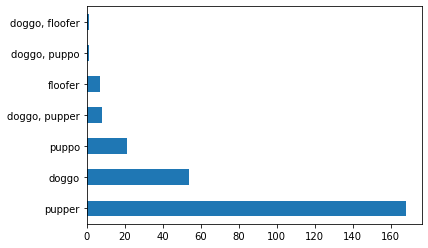

In [115]:
top_dogs_styles.plot(kind='barh')
plt.xticks(rotation=0)
plt.show()

### So The most common dog's style is pupper.

### 2-Name of dogs has most Dogs' rating

In [116]:
df_top_names_rating = df_merge_Twitter_Image_Archive.query('rating>1.3')['name'].value_counts().nlargest(10)
df_top_names_rating

Cassie      1
Kuyu        1
Gabe        1
a           1
Bo          1
Sundance    1
Cermet      1
Doobert     1
Bella       1
Ollie       1
Name: name, dtype: int64

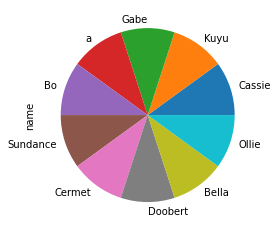

In [117]:
df_top_names_rating.plot(kind='pie')
plt.xticks(rotation=0)
plt.show()

### 3 Which was the most used Twitter app to post tweets


In [118]:

source_list=df_merge_Twitter_Image_Archive['source'].value_counts() / len(df_merge_Twitter_Image_Archive) * 100
source_list

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     98.161329
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      1.304864
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     0.533808
Name: source, dtype: float64

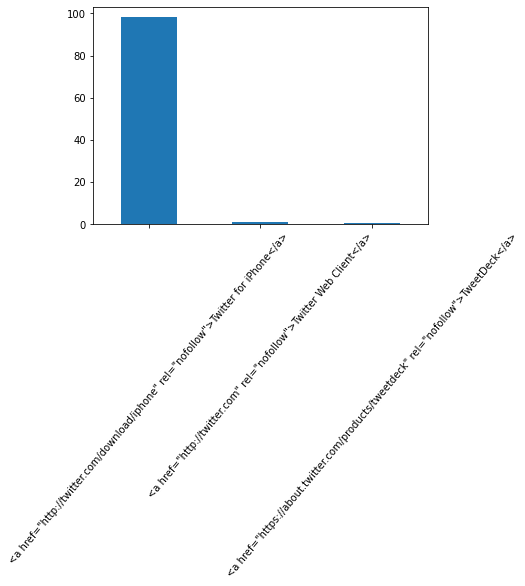

In [119]:
source_list.plot(kind='bar')
plt.xticks(rotation=50)
plt.show()

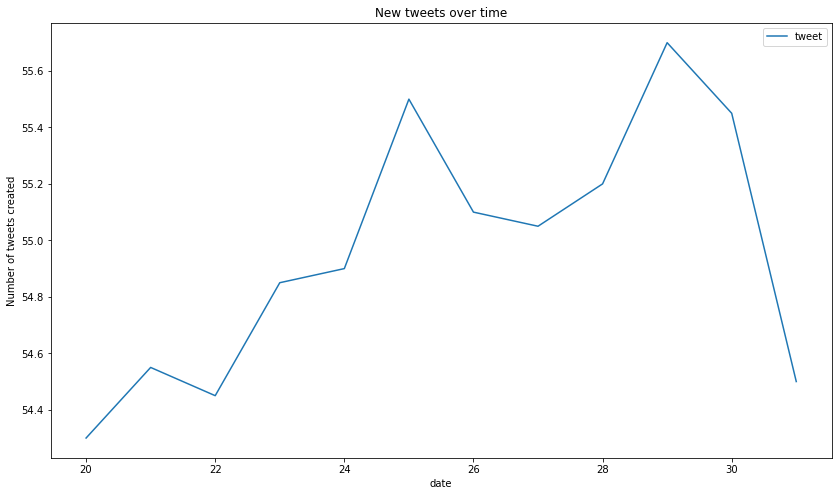

In [120]:
# Create two columns: 'month' to agregate 'date tome on created by month' 
# and 'tweet' to sum a number of tweets for a certain date
# by month
df_merge_Twitter_Image_Archive['date'] = df_merge_Twitter_Image_Archive['created_at'].dt.day
df_merge_Twitter_Image_Archive['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date
df_aggregate = df_merge_Twitter_Image_Archive[['date', 'tweet']].groupby(['date']).count() # alternatively .count() could be used

# Use moving averages to smooth the line
df_aggregate['tweet'] = df_aggregate['tweet'].rolling(window=20).mean()

# Plot
df_aggregate.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()


In [121]:
df_aggregate['tweet'].describe()

count    12.000000
mean     54.962500
std       0.452832
min      54.300000
25%      54.537500
50%      54.975000
75%      55.262500
max      55.700000
Name: tweet, dtype: float64

In [373]:
#There were even more than 55 tweets on average created per day.